<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />


   # PROJET WALMART

# Import Librairies

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import seaborn as sns
# This cell imports all the libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore") # to avoid deprecation warnings
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "notebook" # to be replaced by "iframe" if working on JULIE

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


# Import Dataset

In [3]:
df= pd.read_csv('Walmart_Store_sales.csv')
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


# Partie 1 : Analyse des données

In [4]:
# Basic stats
print("Number of rows: {}".format(df.shape[0]))
print()

print("Display of df: ")
display(df.head(10))
print()

print("Info of df: ")
display(df.info())
print()
        
print("Basic statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()
        

Number of rows: 150

Display of df: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833



Info of df: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


None


Basic statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


## On va créer des colonnes  pour l'année 'year',le mois 'Month',le jour  'Day' et le jour dans la semaine 'Dayofweek' çàd lundi mardi mercredi jeudi..
## on utilisera la methode .dt.day et la methode .dt.Dayofweek.

In [5]:
df.loc[df['Date'].notnull(), 'Year'] = df.loc[df['Date'].notnull(), 'Date'].astype('datetime64').dt.year

df.loc[df['Date'].notnull(), 'Month'] = df.loc[df['Date'].notnull(), 'Date'].astype('datetime64').dt.month

df.loc[df['Date'].notnull(), 'Day'] = df.loc[df['Date'].notnull(), 'Date'].astype('datetime64').dt.day

df.loc[df['Date'].notnull(), 'Dayofweek'] = df.loc[df['Date'].notnull(), 'Date'].astype('datetime64').dt.dayofweek

df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Dayofweek
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936,2012.0,7.0,27.0,4.0
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012.0,3.0,2.0,4.0
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN,2010.0,10.0,12.0,1.0
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833,NaN,NaN,NaN,NaN


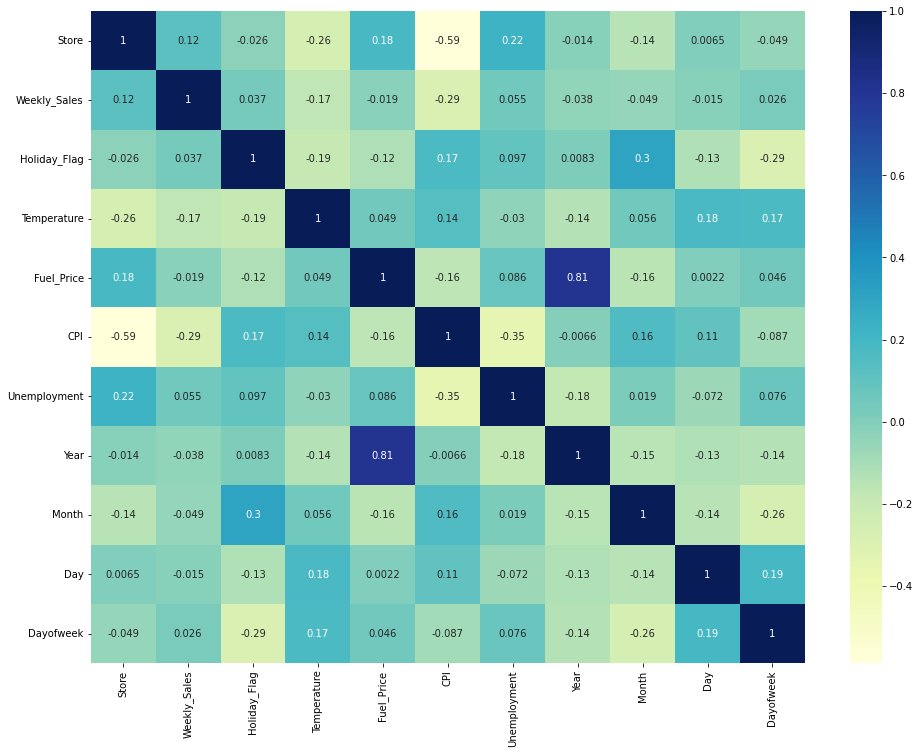

In [6]:
# Plotting a matrix correlation of features
corr = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='YlGnBu');

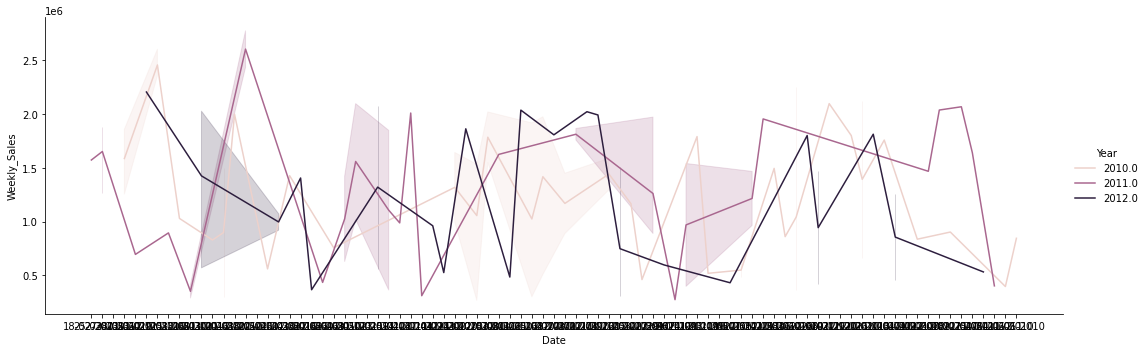

In [7]:
sns.relplot(
        x=df['Date'],
        y=df['Weekly_Sales'],
        hue= df['Year'],
        data = df,
        kind='line',
        height=5,
        aspect=3,
       
        
    )
plt.show()

In [8]:
df.Date.value_counts

<bound method IndexOpsMixin.value_counts of 0      18-02-2011
1      25-03-2011
2      27-07-2012
3             NaN
4      28-05-2010
          ...    
145    18-06-2010
146           NaN
147    11-06-2010
148    12-08-2011
149    20-04-2012
Name: Date, Length: 150, dtype: object>

In [9]:
df.Store.value_counts()

3.0     15
1.0     11
18.0    10
13.0     9
5.0      9
14.0     9
19.0     9
17.0     8
8.0      8
2.0      8
7.0      8
20.0     7
4.0      7
6.0      7
10.0     5
12.0     5
16.0     4
9.0      4
15.0     4
11.0     3
Name: Store, dtype: int64

In [10]:
missing = df.isnull().sum()
missing

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
Year            18
Month           18
Day             18
Dayofweek       18
dtype: int64

In [11]:
df.Date

0      18-02-2011
1      25-03-2011
2      27-07-2012
3             NaN
4      28-05-2010
          ...    
145    18-06-2010
146           NaN
147    11-06-2010
148    12-08-2011
149    20-04-2012
Name: Date, Length: 150, dtype: object

## supprimer la colonne Date

In [12]:
df_cleanData = df.drop(["Date"],axis=1)
df_cleanData

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Dayofweek
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
2,17.0,NaN,0.0,NaN,NaN,130.719581,5.936,2012.0,7.0,27.0,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
145,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010.0,6.0,18.0,4.0
146,7.0,716388.81,NaN,20.74,2.778,NaN,NaN,NaN,NaN,NaN,NaN
147,17.0,845252.21,0.0,57.14,2.841,126.111903,NaN,2010.0,11.0,6.0,5.0
148,8.0,856796.10,0.0,86.05,3.638,219.007525,NaN,2011.0,12.0,8.0,3.0


In [13]:
df_cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Weekly_Sales  136 non-null    float64
 2   Holiday_Flag  138 non-null    float64
 3   Temperature   132 non-null    float64
 4   Fuel_Price    136 non-null    float64
 5   CPI           138 non-null    float64
 6   Unemployment  135 non-null    float64
 7   Year          132 non-null    float64
 8   Month         132 non-null    float64
 9   Day           132 non-null    float64
 10  Dayofweek     132 non-null    float64
dtypes: float64(11)
memory usage: 13.0 KB


## supprimer les valeurs nulles dans 'Weekly_Sales']

In [14]:
df_cleanData = df_cleanData.dropna(subset = ['Weekly_Sales'] ,axis=0)
df_cleanData

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Dayofweek
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
145,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010.0,6.0,18.0,4.0
146,7.0,716388.81,NaN,20.74,2.778,NaN,NaN,NaN,NaN,NaN,NaN
147,17.0,845252.21,0.0,57.14,2.841,126.111903,NaN,2010.0,11.0,6.0,5.0
148,8.0,856796.10,0.0,86.05,3.638,219.007525,NaN,2011.0,12.0,8.0,3.0


In [15]:
df_cleanData.describe(include='all')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Dayofweek
count,136.000000,1.360000e+02,125.000000,121.000000,124.000000,125.000000,122.000000,118.000000,118.000000,118.000000,118.000000
mean,10.014706,1.249536e+06,0.072000,60.853967,3.316992,178.091144,7.665582,2010.822034,6.830508,15.949153,3.771186
std,6.124614,6.474630e+05,0.259528,18.514432,0.479540,40.243105,1.619428,0.812628,3.395082,8.687202,1.283765
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,2010.000000,1.000000,1.000000,0.000000
25%,4.000000,6.050757e+05,0.000000,45.220000,2.838500,131.637000,6.690000,2010.000000,4.000000,8.000000,4.000000
50%,10.000000,1.261424e+06,0.000000,62.250000,3.451000,196.919506,7.477000,2011.000000,6.000000,16.500000,4.000000
75%,15.250000,1.806386e+06,0.000000,75.950000,3.724000,214.878556,8.150000,2011.750000,10.000000,24.000000,4.000000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000,2012.000000,12.000000,31.000000,6.000000


#### on va faire des histogrammes pour les colonnes 'Weekly_Sales', 'Fuel_Price', 'CPI', 'Temperature' ... etc
#### pour voir comment les variables sont réparties au sein même de ces colonnes 
#### (ex: est ce que  les ventes sont elles bien réparties ?)

In [16]:
# Distribution of each numeric variable
from plotly.subplots import make_subplots


num_features = ['Weekly_Sales','CPI','Temperature','Fuel_Price','Unemployment']
fig1 = make_subplots(rows = len(num_features), cols = 1, subplot_titles = num_features)
for i in range(len(num_features)):
    fig1.add_trace(
        go.Histogram(
            x = df[num_features[i]], nbinsx = 4),
        row = i + 1,
        col = 1)
fig1.update_layout(
        title = go.layout.Title(text = "Distribution of quantitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=800)
fig1.show('iframe')


## l'objectif du projet (l'enjeu business pour walmart ) c'est prédire les ventes pour pouvoir anticiper ses achats auprés des fournisseurs
## c'est du machine learning supervisé c'est à dire qu'on a une Target Y et ici le Y c'est 'Weekly_Sales'

## * pour faire une prédiction on a besoin d'un modèle de régression linéaire 

### * en entrée les variables telle que 'CPI' 'Temperature','Fuel_Price','Unemployment' 
### * des variables qui sont normalisées selon la courbe de gauss (c'est la courbe en cloche pleines de variables concentrées autour de la moyenne et aprés ça se répartie équitablement sur les côtés ) plus on s'éloigne de la moyenne moins il y'en a"

## Dans notre cas on voit que l'ensemble de nos courbes ne sont pas  en cloches 

## ==> Ce n'est pas grave mais Il faut  savoir que les modèles de régression linéaires ont de moins bonnes performances lorsque Les variables d'entrée ne sont pas normalisées selon la courbe de gauss.

# Partie 2 : Modèle de base (régression linéaire)

### on verifie qu'on a pas de valeures nulles dans notre colonne Target
on prend  que les lignes qui sont non nulles
==> on va d'abord supprimer les lignes qui n'ont pas de valeurs en Y
* Notre Y c'est le 'Weekly_Sales' on va supprimer lez NaN (on prend  que les lignes qui sont non nulles)

In [17]:
df = df.loc[df['Weekly_Sales'].notnull(), :]

df['Weekly_Sales'].isnull()==True

0      False
1      False
3      False
4      False
5      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Weekly_Sales, Length: 136, dtype: bool

In [18]:
df['Weekly_Sales'].value_counts()

1864746.10    1
845252.21     1
1244390.03    1
856796.10     1
431985.36     1
             ..
1831676.03    1
1861802.70    1
2248645.59    1
1768172.31    1
1797732.56    1
Name: Weekly_Sales, Length: 136, dtype: int64

### Maintenant on va gérer les outliers çàd les points aberants qui s'eloignent des courbes
#### (qui peuvent venir d'une erreur des capteurs, de l'utilisateur qui a mal renseigné les données...)

### Dans l'ennoncé de l'exercice on nous dit  ("Supprimez les lignes contenant des valeurs invalides ou aberrantes : Dans ce projet, seront considérées comme aberrantes toutes les caractéristiques numériques qui ne sont pas comprises dans l'intervalle :  [𝑋¯−3𝜎,𝑋¯+3𝜎] .
### si il est à  3 écart-types de la moyenne: (C'est ce qu'on prend en géneral dans tous les projets data science)
### Cela concerne les colonnes : Température, Prix du carburant, IPC et Chômage. ")


#### *exemple: si on prend la variable 'Temperature' on va calculer la Moyenne et on va avoir une température Moyenne  de 50 et un écart-type de  5 par exemple. Tous les points qui ne vont pas être comprises entre 35 et 65  seront des outliers
[  (50 + 3*5) donc 50 + 15 = 65 et (50 - 3*5) 50 - 15 = 35 ]

In [19]:
#suppression des outliers
def drop_outliers(df, col_name):
    to_keep = (df[col_name].isnull()) | ((df[col_name] < df[col_name].mean() + 3 * df[col_name].std()) & 
               (df[col_name] > df[col_name].mean() - 3 * df[col_name].std()))
    
    df=df.loc[to_keep,:]
    
    return(df)

liste_net=['Temperature', 'Fuel_Price', 'CPI' , 'Unemployment']

for i in liste_net:                            # boucle pour chaque élément dans list_net
    df = drop_outliers(df,i)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Dayofweek
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


# EXPLICATION DE LA CELLULE DE CODE CI-DESSUS


==> dans un premier temps on va vouloir créer une liste dans laquelle on va mettre l'esnsemble des lignes qu'on souhaite garder 
to_keep = (df[col_name].isnull()) | ((df[col_name] < df[col_name].mean() + 3 * df[col_name].std())

dans cette colonne to_keep on va garder uniquement:
 *les variables qui ne sont pas nulles
 *celles qui sont inférieures à la moyenne + 3 écarts-types et celles qui sont supérieures (la frontière Min et la frontière Max le signe  | qui est entre les deux c'est ET en code 
 
==> Ensuite on va mettere dans la variable df uniquement les lignes to_keep ""df=df.loc to_keep (dans lequelles on va avoir tout ce qu'on va garder) 
et garder toutes les colonnes et comme on est dans un dataframe on met virgule et deux points ,: et on ferme les acolades 

==> mettre dans un nouveau df donc df = df.loc[to_keep,;]
==>return(df)
==> Ensuite on va appliquer cette fonction à l'ensemble des colonnes qu'on souhaite nettoyer: 
  == on crée une liste avec l'ensemble des colonnes 
  == ensuite une boucle for i in list_net:
                            df = drop_outliers(df,i)
                            mettre seulement i puisque i représente à chaque fois le nom d' une colonne
 Attention mettre df parce qu'il faut que ça soit nommé de  la même façon  que drop_outliers def drop_outliers(df, col_name):
 du coup à chaque fois il va venir nettoyer df

###  il faut définir notre variable X et notre variable  y et les séparer

###  (on met features_list [] dans une liste et target variable dans une liste [])

In [20]:
# Separate target variable Y from features X

print("Separating labels from features...")
features_list = ["Store","Holiday_Flag", "Temperature", "Fuel_Price", "CPI" , "Unemployment","Year","Month","Day","Dayofweek"]
target_variable = ["Weekly_Sales"]

X = df.loc[:,features_list]
Y = df.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
   Weekly_Sales
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
3   11.0           0.0        84.57         NaN  214.556497         7.346   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
5    4.0           0.0          NaN       2.756  126.160226         7.896   

     Year  Month   Day  Dayofweek  
0  2011.0    2.0  18.0        4.0  
1  2011.0    3.0  25.0        4.0  
3     NaN    NaN   NaN        NaN  
4  2010.0    5.0  28.0        4.0  
5  2010.0    5.0  28.0        4.0  


### convertir les dataframes pandas en tableaux numpay pour pouvoir utiliser sickit_learn

In [21]:
#Convertir les Dataframe pandas en tableaux numpay avant d'utiliser 
print("Convert pandas Dataframe to numpay arrays")

Convert pandas Dataframe to numpay arrays


In [22]:
print("Convert pandas DataFrames to numpy arrays...")
X = X.values
Y = Y.values.tolist()
print("...Done")
print(X[0:5,:])
print()
print(Y[0:5])

Convert pandas DataFrames to numpy arrays...
...Done
[[6.00000000e+00            nan 5.96100000e+01 3.04500000e+00
  2.14777523e+02 6.85800000e+00 2.01100000e+03 2.00000000e+00
  1.80000000e+01 4.00000000e+00]
 [1.30000000e+01 0.00000000e+00 4.23800000e+01 3.43500000e+00
  1.28616064e+02 7.47000000e+00 2.01100000e+03 3.00000000e+00
  2.50000000e+01 4.00000000e+00]
 [1.10000000e+01 0.00000000e+00 8.45700000e+01            nan
  2.14556497e+02 7.34600000e+00            nan            nan
             nan            nan]
 [6.00000000e+00 0.00000000e+00 7.88900000e+01 2.75900000e+00
  2.12412888e+02 7.09200000e+00 2.01000000e+03 5.00000000e+00
  2.80000000e+01 4.00000000e+00]
 [4.00000000e+00 0.00000000e+00            nan 2.75600000e+00
  1.26160226e+02 7.89600000e+00 2.01000000e+03 5.00000000e+00
  2.80000000e+01 4.00000000e+00]]

[[1572117.54], [1807545.43], [1244390.03], [1644470.66], [1857533.7]]


#### Là on a nos featurs c'est une grande liste où il y'a des sous-listes 
#### les sous-listes ça représente une ligne et comme on a 5 lignes 
#### on a une variable Y des sous listes d'un seul élément qui représente Weekly_Sales
#### on a 10 éléments dans chaque ligne (Store, Holiday_Flag Temperature,  Fuel_Price ,  CPI,  Unemployment, Year, Month, Day,  Dayofweek)

## diviser le dataset en Train set & Test set

In [23]:
#Divide dataset train set and test set
print("Divide dataset Train set and Test set...")
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...done")

Divide dataset Train set and Test set...
...done


# training pipline

In [24]:
#Numeric/ Categorial features
numerical_features = ["Temperature","Fuel_Price","CPI","Unemployment"]
categoriel_features = ["Store","Holiday_Flag"]

### on fait un numeric transformer pour remplacer les valeurs manquantes par la moyenne

In [25]:
# Create pipeline for numeric features

numeric_features = [2,3,4,5,6,7,8,9] # Positions of numeric columns in X_train/X_test 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by the variables' mean
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = [0, 1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by the most frequent values for each variable
   # ('encoder', ('encoder', OneHotEncoder(categories=[['Holiday_Flag','Store' ]])   # first column will be dropped to avoid creating correlations between features   
     ('encoder', OneHotEncoder(drop='first'))
     ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
# Utiliser ColumnTransformer pour faire un objet préprocesseur qui décrit tous les traitements à effectuer. 
                 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
    

# Preprocessings

In [26]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !! 
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
[[4.00000000e+00            nan 8.45900000e+01 3.46900000e+00
  1.29112500e+02 5.64400000e+00 2.01100000e+03 8.00000000e+00
  7.00000000e+00 6.00000000e+00]
 [1.00000000e+00 0.00000000e+00 6.22500000e+01 3.30800000e+00
  2.18220509e+02 7.86600000e+00 2.01100000e+03 1.10000000e+01
  1.80000000e+01 4.00000000e+00]
 [1.80000000e+01 0.00000000e+00 2.13300000e+01 2.78800000e+00
  1.31527903e+02 9.20200000e+00            nan            nan
             nan            nan]
 [1.80000000e+01 0.00000000e+00 6.91200000e+01 2.90600000e+00
  1.32293936e+02            nan 2.01000000e+03 5.00000000e+00
  2.80000000e+01 4.00000000e+00]
 [5.00000000e+00 0.00000000e+00 6.23700000e+01            nan
  2.12560411e+02 6.76800000e+00 2.01000000e+03 1.20000000e+01
  1.10000000e+01 5.00000000e+00]]
...Done.
[[ 1.47125449e+00  3.42315189e-01 -1.33363663e+00 -1.83554421e+00
   1.93027545e-01  3.80851907e-01 -1.18560403e+00  1.88215879e+00
   0.00000000e+00  0.00000000e+

### on est prêt pour la partie modélisation

# Partie 2 : Linear Regression 

## On va faire une regression linéaire sur Y on crée une variable qui s'appelle model et qui est égale à la linear regression de scikitlearn et on le fit

In [27]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [28]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred[:5]) #print des 5 premières valeures
print()

Predictions on training set...
...Done.
[[2200430.64193985]
 [1586005.28080528]
 [1183539.59226717]
 [1257457.96336874]
 [ 376493.51922136]]



### Maintenant on va faire la même chose mais sur X_test

In [29]:
# Predictions on test set
print("Predictions on training set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])

Predictions on training set...
...Done.
[[ 427992.98818044]
 [ 501947.09657406]
 [1082837.71030617]
 [ 924915.64015135]
 [ 339104.97690527]]


# Explication des chiffres:

# On a fait notre modèle mais on ne sait pas s'il est precis ou pas ??

on a appliqué une régression  linéaire càd en gros : on avait des points et on a essayé d'en déduire une droite à partir de ces points.
là on l'a appliqué aussi bien sur le X_train que sur  X_test

### sur le X_train le premier chiffre qu'on a c'est LA PREMIERE SEMAINE  il y'a eu un CA 367787 euros prédit en fonction des variables qu'on a mis 
### Toutes les valeurs correspondent aux CA de chaque semaine
### et ceci on l'a fait sur le training set (X_train) 

# Ce qu'on veut voir comme souvent en machine learning c'est  " on fait apprendre notre modele sur le dataset d'entrainement le x_train et on veut voir s'il est bon sur le X_test et pour le savoir on va calculer le R2 score"


In [30]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.967913379327382
R2 score on test set :  0.9354208806891127


## Analyse du résultat :

### il y'a un overfiting le score sur le training set est supérieur au test set (soit respectivement 96% et 93%)
#### et pour empêcher l'overfiting on va faire la régularisation
#### çàd une modélisation linéaire dans laquelle on va rajouter un paramètre qui va nous permettre de diminuer l'overfiting 

# Part 3 : Regularization 

### On va donc changer de model on va utiliser le model Ridge au lieu d'une régression
### On ne va pas faire de cross-validation pour le moment parce qu'on ne fait pas de validation croisée

In [31]:
regressor = Ridge()
regressor.fit(X_train, Y_train)
print("...Done.")

Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

...Done.
...Done.
[[2029545.18120746]
 [1351974.75876874]
 [1345890.28088066]
 [1160011.67217083]
 [ 502733.6383541 ]]

...Done.
[[ 481090.13549761]
 [ 602298.39423846]
 [1193337.97091106]
 [ 954747.30332389]
 [ 419640.87299602]]



### et là on va printer R^2 scores pour voir si on obtient de meilleures résultats

In [32]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9283007608521012
R2 score on test set :  0.9057685640139864


### le model Ridge a permis de réduire un peu l'overfiting (92% et 90%) Mais ce n'est pas encore super

### on va donc améliorer encore notre model avec un GridSearch çàd qu'on va essayer plusieurs valeurs d'hyperparamétres pour essayer de détérminer ceux qui permettent d'avoir le meilleur résultat

#### params alpha un des parametres de ridge va essayer toutes les valeures entre 0 et 1000 (on peut mettre plus mais ça demande beaucoup de calcul)
#### on va modéliser plusieurs fois 

In [33]:
# Grid search to tune the regularization strength
# Recherche de grille pour ajuster la force de régularisation

from sklearn.model_selection import GridSearchCV

params = {'alpha': np.arange(0, 1000, 1)} # determine the range of parameters to try
ridge = Ridge() # create an instance of the model
ridgeCV = GridSearchCV(ridge, params, cv=5, verbose = 1)
ridgeCV.fit(X_train, Y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,...
       910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922,
       923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935,
       936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
       949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974,
       975, 97

# ensuite on va prédire sur Y_pred

In [34]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = ridgeCV.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = ridgeCV.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

# Print scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

Predictions on training set...
...Done.
[[2200430.64193985]
 [1586005.28080528]
 [1183539.59226717]
 [1257457.96336875]
 [ 376493.51922136]]

Predictions on test set...
...Done.
[[ 427992.98818044]
 [ 501947.09657406]
 [1082837.71030618]
 [ 924915.64015135]
 [ 339104.97690527]]

R2 score on training set :  0.967913379327382
R2 score on test set :  0.9354208806891127


#### Ce n'est pas mieux  (96% et 93%) on est revenu quasiment au 1er score 
## on n'a pas trouvé de valeur Alpha  qui permettrait de réduire la régularisation

### On va utiliser la méthode Lasso 
### c'est une régression linéaire qui permet de réduire l'overfiting différente de ridge 
#### on met le même code on change juste le nom du model on met  lasso

# Lasso

In [35]:
# Regularised model Lasso
lasso = Lasso() # create an instance of the model
lasso.fit(X_train, Y_train)

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = lasso.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = lasso.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

# Print scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

Predictions on training set...
...Done.
[2200401.95972064 1585969.51735916 1183597.79354137 1257432.3608668
  376507.67041743]

Predictions on test set...
...Done.
[ 427980.75409783  501950.88489208 1082893.69902919  924911.58629018
  339099.30247735]

R2 score on training set :  0.9679133766946094
R2 score on test set :  0.9354376009426368


## Ce n'est pas terrible non plus

### on va tester avec le GridSearch

In [36]:
# Grid search to tune the regularization strength
# Recherche de grille pour ajuster la force de régularisation

params = {'alpha': np.arange(1, 1000, 1)} # determine the range of parameters to try
lasso = Lasso() # create an instance of the model
lassoCV = GridSearchCV(lasso, params, cv=5, verbose = 1)
lassoCV.fit(X_train, Y_train)

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = lassoCV.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = lassoCV.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

# Print scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Predictions on training set...
...Done.
[2186557.1008442  1561375.13956046 1210510.60440622 1243208.40757123
  382902.97820854]

Predictions on test set...
...Done.
[ 424403.67007401  504916.56911357 1110206.51156378  923785.95068858
  337313.82931538]

R2 score on training set :  0.9672419557657534
R2 score on test set :  0.9422631073300427


## c'est un peu mieux 96% ET 94% mais pas terrible non plus

In [37]:
lassoCV.best_params_

{'alpha': 541}

#### IL NOUS DONNE LA VALEUR D'ALPHA QUI PERMET LE MEILLEUR RESULTAT ET ICI C'EST  "alpha:541"
### ATTENTION A CHAQUE FOIS QU"ON VA LE RELANCER IL VA NOUS DONNER UNE VALEUR DE alpha DIFFERENTE

#### ON A PLUSIEURS MINIMUMS POUR UNE FONCTION 
#### DES FOIS IL Y'A PLUSIEURS VALEURS POSSIBLES ET DES FOIS ON EST BLOQUE DANS UNE DES VALEURS ET ON ARRIVE PAS A S'EXTIRPER POUR ALLER SUR UNE AUTRE.
#### DES FOIS C'EST DES PROBLEMES D'OPTIMISATION QUI SONT UN PEU COMPLEXES , POUR DIRE QU'IL N'Y A PAS QU'UNE VALEUR POSSIBLE

# ON AMELIORE TRES PEU LA DIFFERENCE ENTRE LE TRAINING SET ET LE TEST SET MAIS CE N'EST PAS DINGUE